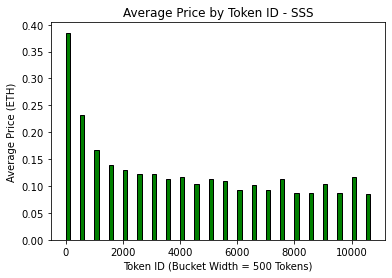

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

COLLECTION_FOLDER = "sss"
COLLECTION_NAME = "SSS"
TOKENS = 11110
BUCKET_WIDTH = 500
BINS = int(TOKENS / BUCKET_WIDTH)
BAR_WIDTH = 150
PLOT_COLOR = "g"

sales = pd.read_csv("../{}/data/early_sales.csv".format(COLLECTION_FOLDER))

rarity_dict = {}
total_sales = 0

for i in range(0, BINS): 
    lower = i * BUCKET_WIDTH
    upper = (i + 1) * BUCKET_WIDTH
    hist_bin = sales[ (sales["TOKEN_ID"] > lower) & (sales["TOKEN_ID"] < upper)]
    rarity_dict[lower] = hist_bin["PRICE"].sum() / len(hist_bin)
    
plt.bar(rarity_dict.keys(), rarity_dict.values(), width = BAR_WIDTH, color=PLOT_COLOR, align = "edge", edgecolor ='black')
plt.title("Average Price by Token ID - {}".format(COLLECTION_NAME))
plt.xlabel("Token ID (Bucket Width = {} Tokens)".format(BUCKET_WIDTH), fontsize = 10)
plt.ylabel("Average Price (ETH)", fontsize = 10)

plt.savefig('../{}/figures/{}_early_price_by_id.png'.format(COLLECTION_FOLDER, COLLECTION_NAME), dpi = 300)
plt.show()
